## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

C:\Users\benja\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [2]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [21]:
def build_mlp(input_shape, output_unit=10, num_neurons=[128, 64, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    for i, p in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=p, activation='relu', name='hidden'+str(i))(input_layer)
        else:
            x = keras.layers.Dense(units=p, activation='relu', name='hidden'+str(i))(x)
    
    out = keras.layers.Dense(units=10, activation='softmax', name='output')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
        
    return model

In [19]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [22]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    for is_nes in [False, True]:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print('Experiment with lr {} and Nesterov {}'.format(lr, str(is_nes)))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr=lr, nesterov=is_nes, momentum=MOMENTUM)
        
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]
    
        exp_name_tag = 'exp-lr-{}-nes-{}'.format(lr, is_nes)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}
        

Experiment with lr 0.1 and Nesterov False
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden0 (Dense)              (None, 128)               393344    
_________________________________________________________________
hidden1 (Dense)              (None, 64)                8256      
_________________________________________________________________
hidden2 (Dense)              (None, 128)               8320      
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 411,210
Trainable params: 411,210
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 10s 197us/step - loss: 2.0158 - acc: 0.2565 - val_loss: 1.8711 - val_acc: 0.3250
Epoch 2/50
50000/50000 [==============================] - 9s 185us/step - loss: 1.8213 - acc: 0.3375 - val_loss: 1.7783 - val_acc: 0.3439
Epoch 3/50
50000/50000 [==============================] - 9s 180us/step - loss: 1.7674 - acc: 0.3597 - val_loss: 1.7466 - val_acc: 0.3795
Epoch 4/50
50000/50000 [==============================] - 9s 180us/step - loss: 1.7546 - acc: 0.3664 - val_loss: 1.7318 - val_acc: 0.3811
Epoch 5/50
50000/50000 [==============================] - 9s 180us/step - loss: 1.7128 - acc: 0.3833 - val_loss: 1.7279 - val_acc: 0.3651
Epoch 6/50
50000/50000 [==============================] - 9s 177us/step - loss: 1.7126 - acc: 0.3823 - val_loss: 1.7138 - val_acc: 0.3897
Epoch 7/50
50000/50000 [==============================] - 9s 183us/step - loss: 1.6988 - acc: 0.3908 - val_loss: 1.8923 -

50000/50000 [==============================] - 9s 182us/step - loss: 1.9515 - acc: 0.2872 - val_loss: 1.7577 - val_acc: 0.3701
Epoch 2/50
50000/50000 [==============================] - 9s 178us/step - loss: 1.7308 - acc: 0.3772 - val_loss: 1.6690 - val_acc: 0.3920
Epoch 3/50
50000/50000 [==============================] - 9s 176us/step - loss: 1.6643 - acc: 0.4007 - val_loss: 1.6075 - val_acc: 0.4267
Epoch 4/50
50000/50000 [==============================] - 9s 173us/step - loss: 1.5913 - acc: 0.4298 - val_loss: 1.5788 - val_acc: 0.4370
Epoch 5/50
50000/50000 [==============================] - 9s 176us/step - loss: 1.5469 - acc: 0.4468 - val_loss: 1.5419 - val_acc: 0.4476
Epoch 6/50
50000/50000 [==============================] - 9s 175us/step - loss: 1.5220 - acc: 0.4556 - val_loss: 1.5309 - val_acc: 0.4540
Epoch 7/50
50000/50000 [==============================] - 9s 177us/step - loss: 1.4927 - acc: 0.4651 - val_loss: 1.5052 - val_acc: 0.4635
Epoch 8/50
50000/50000 [=====================

50000/50000 [==============================] - 10s 191us/step - loss: 1.6414 - acc: 0.4177 - val_loss: 1.6640 - val_acc: 0.4117
Epoch 3/50
50000/50000 [==============================] - 9s 186us/step - loss: 1.5547 - acc: 0.4479 - val_loss: 1.5749 - val_acc: 0.4360
Epoch 4/50
50000/50000 [==============================] - 10s 194us/step - loss: 1.4927 - acc: 0.4708 - val_loss: 1.5195 - val_acc: 0.4622
Epoch 5/50
50000/50000 [==============================] - 9s 182us/step - loss: 1.4485 - acc: 0.4863 - val_loss: 1.5042 - val_acc: 0.4728
Epoch 6/50
50000/50000 [==============================] - 9s 179us/step - loss: 1.4018 - acc: 0.5018 - val_loss: 1.4425 - val_acc: 0.4835
Epoch 7/50
50000/50000 [==============================] - 9s 181us/step - loss: 1.3737 - acc: 0.5108 - val_loss: 1.5172 - val_acc: 0.4697
Epoch 8/50
50000/50000 [==============================] - 9s 181us/step - loss: 1.3487 - acc: 0.5209 - val_loss: 1.4738 - val_acc: 0.4781
Epoch 9/50
50000/50000 [===================

50000/50000 [==============================] - 9s 178us/step - loss: 1.7981 - acc: 0.3652 - val_loss: 1.7660 - val_acc: 0.3748
Epoch 4/50
50000/50000 [==============================] - 9s 175us/step - loss: 1.7506 - acc: 0.3780 - val_loss: 1.7266 - val_acc: 0.3909
Epoch 5/50
50000/50000 [==============================] - 9s 178us/step - loss: 1.7109 - acc: 0.3958 - val_loss: 1.6863 - val_acc: 0.4059
Epoch 6/50
50000/50000 [==============================] - 9s 177us/step - loss: 1.6772 - acc: 0.4078 - val_loss: 1.6731 - val_acc: 0.4006
Epoch 7/50
50000/50000 [==============================] - 9s 180us/step - loss: 1.6448 - acc: 0.4190 - val_loss: 1.6276 - val_acc: 0.4259
Epoch 8/50
50000/50000 [==============================] - 9s 176us/step - loss: 1.6140 - acc: 0.4290 - val_loss: 1.6027 - val_acc: 0.4289
Epoch 9/50
50000/50000 [==============================] - 9s 177us/step - loss: 1.5859 - acc: 0.4381 - val_loss: 1.5856 - val_acc: 0.4376
Epoch 10/50
50000/50000 [====================

50000/50000 [==============================] - 11s 210us/step - loss: 1.8018 - acc: 0.3682 - val_loss: 1.7697 - val_acc: 0.3791
Epoch 4/50
50000/50000 [==============================] - 11s 212us/step - loss: 1.7456 - acc: 0.3870 - val_loss: 1.7237 - val_acc: 0.3963
Epoch 5/50
50000/50000 [==============================] - 10s 209us/step - loss: 1.7002 - acc: 0.4033 - val_loss: 1.6853 - val_acc: 0.4002
Epoch 6/50
50000/50000 [==============================] - 10s 207us/step - loss: 1.6635 - acc: 0.4163 - val_loss: 1.6541 - val_acc: 0.4191
Epoch 7/50
50000/50000 [==============================] - 10s 208us/step - loss: 1.6311 - acc: 0.4269 - val_loss: 1.6287 - val_acc: 0.4269
Epoch 8/50
50000/50000 [==============================] - 11s 210us/step - loss: 1.6015 - acc: 0.4379 - val_loss: 1.6024 - val_acc: 0.4360ETA: 1s - loss: 1.60
Epoch 9/50
50000/50000 [==============================] - 11s 212us/step - loss: 1.5741 - acc: 0.4478 - val_loss: 1.5871 - val_acc: 0.4367
Epoch 10/50
50000/

6


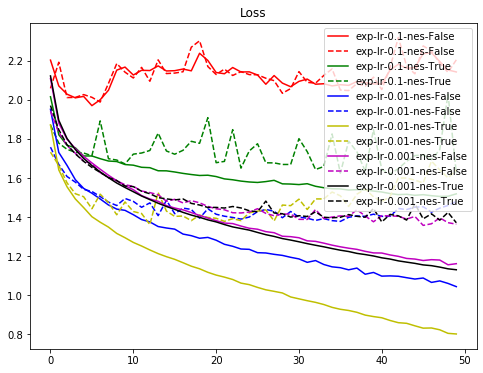

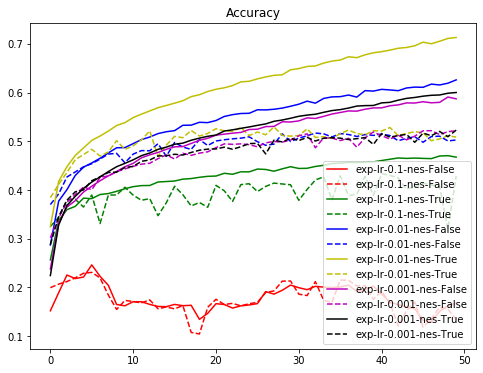

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
print(len(results))
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [ ]:
#Learning rate 太大loss會跳動的很快， learning rate太小收斂得很慢，
#有開nesterov的話也會幫助收斂，但是所有case都有overfitting的問題